*pas dit blok aan (dubbelklik om te wijzigen)*

# 2020 Diffusie werkcollege opdracht
***

## Datum: 27-feb-2020
## Hoofdstuk: 4
## Groep nummer: 32
***
## Student 1
    naam: Julian van Doorn
    Studentnr: s2518074

## Student 2
    naam: Douwe Remmelts
    Studentnr: s2586592


In [1]:
# Dit blok moet altijd als eerste worden uitgevoerd. Verwijder het dus niet!
# voer blokken uit met shift-enter, of met de ▶-knop in de knoppenbalk

from __future__ import division

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

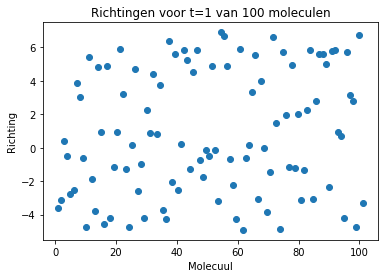

In [2]:
# Opgave 4.3 a

n_molecules = 10000
n_t = 100

min_step = -5
max_step = 7
step_diff = max_step - min_step

richtingen = np.random.random((n_molecules, n_t)) * step_diff + min_step

plt.scatter(np.linspace(1, 101, 100), richtingen[:100,0])
plt.title('Richtingen voor t=1 van 100 moleculen')
plt.ylabel('Richting')
plt.xlabel('Molecuul')
plt.show()

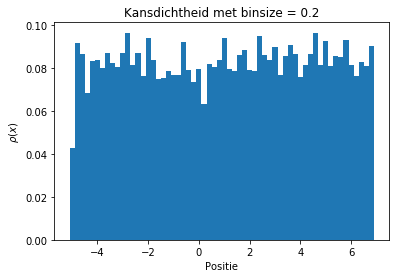

In [3]:
# Opgave 4.3 b

bin_size = 0.2

# Bereken de bins en de centra van de bins
bins = np.arange(1 * min_step - bin_size / 2, 1 * max_step + bin_size / 2, bin_size)
centra = np.arange(1 * min_step, 1 * max_step, bin_size)

frequencies, grenzen = np.histogram(richtingen[:,0], bins)
kansdichtheid = frequencies / (bin_size * n_molecules)

plt.bar(centra, kansdichtheid, width=bin_size)
plt.title(f'Kansdichtheid met binsize = {bin_size}')
plt.xlabel('Positie')
plt.ylabel(r'$\rho(x)$')
plt.show()

We berekenen de $p(x)$ door de frequencies te delen door het aantal moleculen, hierdoor krijgen we de kans. Vervolgens delen we nog door de binsize om de kans te normalizeren en dit geeft $\rho(x)$.

# Opgave 4.3 c

$N_{bins} = step\_diff / bin\_size$, de kans is overal gelijk dus $p(x) = 1 / N_{bins} = bin\_size / step\_diff$.

Dit normalizeren geeft $\rho(x) = p(x) / bin\_size = 1 / step\_diff$. Bij de gebruikte step_diff van 12 geeft dit $\rho(x) = 1/12 \approx 0.083$. Dit komt overeen met wat we zien in onze grafiek.
 

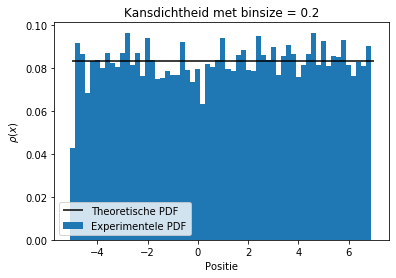

In [4]:
# Opgave 4.3 d

plt.bar(centra, kansdichtheid, width=bin_size, label='Experimentele PDF')
plt.hlines(1/step_diff, 1 * min_step, 1 * max_step, label='Theoretische PDF')
plt.title(f'Kansdichtheid met binsize = {bin_size}')
plt.xlabel('Positie')
plt.ylabel(r'$\rho(x)$')
plt.legend(loc='lower left')
plt.show()

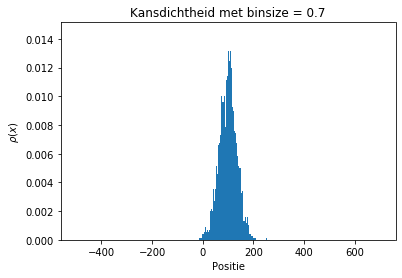

In [5]:
# Opgave 4.3 e

bin_size = 0.7
posities = np.cumsum(richtingen, axis=1)

bins = np.arange(n_t * min_step - bin_size / 2, n_t * max_step + bin_size / 2, bin_size)
centra = np.arange(n_t * min_step, n_t * max_step, bin_size)

frequencies, grenzen = np.histogram(posities[:,n_t - 1], bins)
kansdichtheid = frequencies / (bin_size * n_molecules)

plt.bar(centra, kansdichtheid, width=bin_size)
plt.title(f'Kansdichtheid met binsize = {bin_size}')
plt.xlabel('Positie')
plt.ylabel(r'$\rho(x)$')
plt.show()

# Opgave 4.3f
We passen de breedte van de view aan zodat we ieder molecuul kunnen zien. We maken de binsize ook iets groter zodat we een mooiere figuur krijgen. Bij een kleine binsize zijn er namelijk veel lege bins waardoor de figuur er "schokkerig" uit ziet.

# Opgave 4.3g
$\langle x\rangle=\int_{-5}^7x\rho(x)dx=\int_{-5}^7x\cdot\frac{1}{12}dx=\left[\frac{1}{24}x^2\right]_{-5}^7=1$

In [6]:
# Opgave 4.3h
average_speed = np.mean(posities[:, n_t - 1]) / n_t
print(f'Gemiddelde snelheid op t={n_t} is {average_speed:.3f}')

Gemiddelde snelheid op t=100 is 1.005


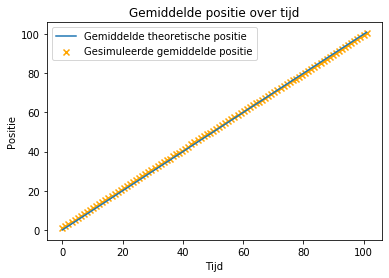

In [7]:
# Opgave 4.3i
average_speed_theorethical = (max_step + min_step) / 2
average_position = np.mean(posities, axis=0)

plt.scatter(np.linspace(0, n_t + 1, n_t), average_position, marker='x', label='Gesimuleerde gemiddelde positie', c='orange')
plt.plot(np.linspace(0, n_t + 1, n_t), np.linspace(0, n_t + 1, n_t) * average_speed_theorethical, label='Gemiddelde theoretische positie')
plt.title('Gemiddelde positie over tijd')
plt.xlabel('Tijd')
plt.ylabel('Positie')
plt.legend()
plt.show()

# Opgave 4.3j
$\sigma^2(1)=\int_{-5}^{7}(x - \langle x\rangle)^2\rho(x) dx$
    We weten dat $\langle x\rangle = 1$, dus dit geeft:
    $\sigma^2=\int_{-5}^{7}(x-1)^2\rho(x) dx=\int_{-5}^{7}\frac{1}{12}(x^2-2x+1) dx = \frac{1}{12}\left[\frac{1}{3}x^3-x^2+x\right]_{-5}^7=12$

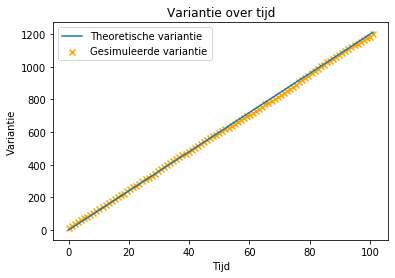

In [8]:
# Opgave 4.3k

D = 6

M1 = average_position
M2 = np.mean(np.square(posities), axis=0)
variantie = M2 - np.square(M1)

plt.scatter(np.linspace(0, n_t + 1, n_t), variantie, marker='x', label='Gesimuleerde variantie', c='orange')
plt.plot(np.linspace(0, n_t + 1, n_t), np.linspace(0, n_t + 1, n_t) * 2 * D, label='Theoretische variantie')
plt.title('Variantie over tijd')
plt.xlabel('Tijd')
plt.ylabel('Variantie')
plt.legend()
plt.show()

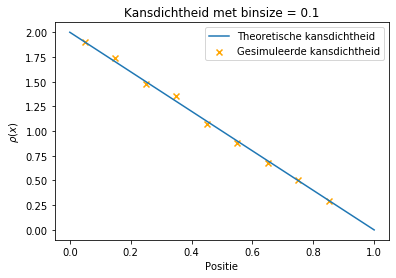

In [9]:
# Opgave 4.4a
n_deeltjes = 10000
steps = 100

min_step = 0
max_step = 1

bin_size = 0.1
time = 1

# Maakt een array met alle richtingen en bepaald zo de posities op elk moment
richtingen = -np.random.random((n_deeltjes, steps))**0.5 + 1
posities = np.cumsum(richtingen, axis=1)

# Bereken de bins en de centra
bins = np.arange(min_step, max_step, bin_size) * time
centra = bins[:-1] + 0.5 * bin_size

# Berekent de frequenties en de PDF
frequencies, grenzen = np.histogram(posities[:,time - 1], bins)
kansdichtheid = frequencies / (bin_size * n_deeltjes)

# Plot de kansdichtheid
plt.scatter(centra, kansdichtheid, marker='x', label='Gesimuleerde kansdichtheid', c='orange')
plt.plot(np.linspace(0,1), np.linspace(0,1)* -2 + 2, label='Theoretische kansdichtheid')

plt.title(f'Kansdichtheid met binsize = {bin_size}')
plt.xlabel('Positie')
plt.ylabel(r'$\rho(x)$')
plt.legend()
plt.show()

# Opgave 4.4b
Bij de kansdichtheid kan het gebeuren dat door het normaliseren de maximale "kans" boven de 1 komt. Het is voor een kansdischtheid alleen belangrijk dat het oppervlalkte 1 is, niet dat de som van alle kansen 1 is. De kans zelf kan nooit groter dan 1 zijn.


# Opgave 4.4c
In ons huiswerk hebben we gevonden dat $\langle x \rangle = \frac{1}{3}$. Dit houdt in dat $\langle x \rangle(t) = \frac{1}{3}t$.


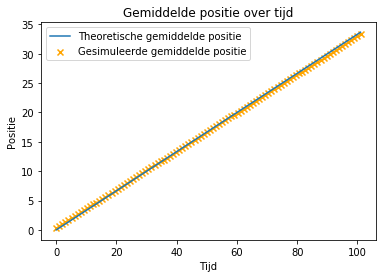

In [10]:
# Opgave 4.4d

# Plot de posities
plt.scatter(np.linspace(0, steps + 1, steps), np.mean(posities, axis=0), marker='x', label='Gesimuleerde gemiddelde positie', c='orange')
plt.plot(np.linspace(0, n_t + 1, n_t), np.linspace(0, n_t + 1, n_t) / 3, label='Theoretische gemiddelde positie')

plt.title('Gemiddelde positie over tijd')
plt.xlabel('Tijd')
plt.ylabel('Positie')
plt.legend()
plt.show()

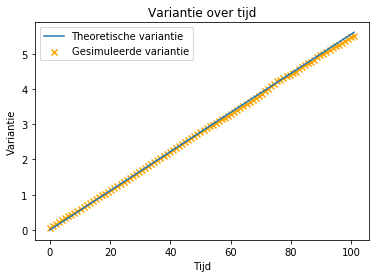

In [11]:
# Opgave 4.4e

M1 = np.mean(posities, axis=0)  # Eerste moment
M2 = np.mean(np.square(posities), axis=0)  # Tweede moment
variance = M2 - np.square(M1)  # Variantie

# Plot de variantie
plt.scatter(np.linspace(0, steps + 1, steps), variance, marker='x', label='Gesimuleerde variantie', c='orange')
plt.plot(np.linspace(0, n_t + 1, n_t), np.linspace(0, n_t + 1, n_t) / 18, label='Theoretische variantie')

plt.title('Variantie over tijd')
plt.xlabel('Tijd')
plt.ylabel('Variantie')
plt.legend()
plt.show()

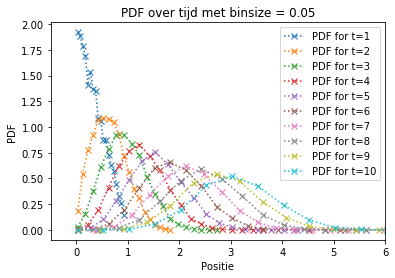

In [12]:
# Opgave 4.5a
bin_size = 0.05

for i in range(1, 11):
    # Deze for-loop plot de PDF voor t = 1 t/m t = 10
    bins = np.arange(min_step, max_step, bin_size) * i
    centra = bins[:-1] + 0.5 * bin_size

    frequencies, grenzen = np.histogram(posities[:,i - 1], bins)
    kansdichtheid = frequencies / (i * bin_size * n_deeltjes)

    plt.plot(centra, kansdichtheid, label=f'PDF for t={i}', marker='x', linestyle='dotted')
    
plt.title(f'PDF over tijd met binsize = {bin_size}')
plt.xlabel('Positie')
plt.ylabel('PDF')
plt.xlim(-0.5, 6)
plt.legend()
plt.show()

# Opgave 4.5b
De gemiddelde snelheid is $1/3$, dus dus $\mu = \frac{1}{3}t$. Verder is te zien dat $2\sigma^2 = 4Dt \Longrightarrow \sigma^2 = 2Dt$. Hieruit volgt dat $\alpha = \frac{\sqrt{t}}{\sqrt{4Dt\pi}} = \frac{1}{2\sqrt{D\pi}}$.

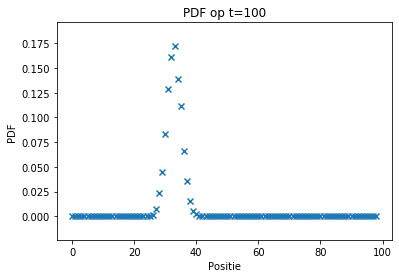

In [13]:
# Opgave 4.5c
bin_size = 0.01

# Bereken de bins en de centra
bins = np.arange(min_step, max_step, bin_size) * steps
centra = bins[:-1] + 0.5 * bin_size

# Bereken de frequencies en de PDF
frequencies, grenzen = np.histogram(posities[:,steps - 1], bins)
kansdichtheid = frequencies / (steps * bin_size * n_deeltjes)

plt.scatter(centra, kansdichtheid, marker='x')
    
plt.title(f'PDF op t={steps}')
plt.xlabel('Positie')
plt.ylabel('PDF')
plt.show()

In [14]:
# Opgave 4.5d

from scipy.optimize import curve_fit

def NormalFunc(x, mu, sigma):
    # model Normal distribuition
    return 1/(sigma*(2*np.pi)**0.5)*np.exp((-(np.square(x-mu)))/(2* sigma* sigma))


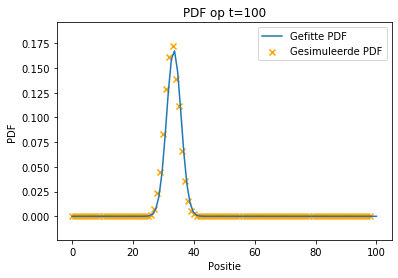

In [15]:
# Opgave 4.5e

# Probeert de normaal verdeling te fitten op de PDF van t=100
p_fit, cov = curve_fit(NormalFunc, np.linspace(0, steps, steps-1), kansdichtheid, p0=[100, 30])

# Plot de normaal verdelingen
plt.scatter(centra, kansdichtheid, marker='x', label='Gesimuleerde PDF', c='orange')
plt.plot(np.linspace(0, steps, steps-1), NormalFunc(np.linspace(0, steps, steps-1), *p_fit), label='Gefitte PDF')
    
plt.title(f'PDF op t={steps}')
plt.xlabel('Positie')
plt.ylabel('PDF')
plt.legend()
plt.show()

In [16]:
# Ogpave 4.5f
print(f'sigma={p_fit[0]:.2f}±{np.sqrt(cov[0,0]):.2f}')
print(f'mu={p_fit[1]:.3f}±{np.sqrt(cov[1,1]):.3f}')

sigma=33.44±0.01
mu=2.371±0.010


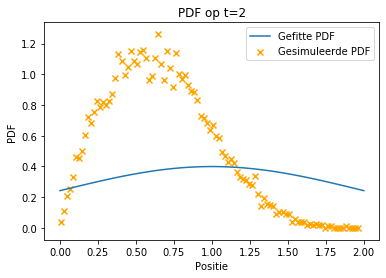

sigma=1.00±0.29
mu=1.000±51508777.322


In [17]:
# Opgave 4.5g
steps=2

# Bereken de bins en de centra
bins = np.arange(min_step, max_step, bin_size) * steps
centra = bins[:-1] + 0.5 * bin_size

# Bereken de frequencies en de PDF
frequencies, grenzen = np.histogram(posities[:,steps - 1], bins)
kansdichtheid = frequencies / (steps * bin_size * n_deeltjes)

# Probeert de normaal verdeling te fitten op de PDF van t=2
p_fit, cov = curve_fit(NormalFunc, np.linspace(0, steps, steps-1), kansdichtheid, p0=[1,1])

# Plot de PDF
plt.scatter(centra, kansdichtheid, marker='x', label='Gesimuleerde PDF', c='orange')
plt.plot(np.linspace(0, steps, 100), NormalFunc(np.linspace(0, steps, 100), *p_fit), label='Gefitte PDF')
    
plt.title(f'PDF op t={steps}')
plt.xlabel('Positie')
plt.ylabel('PDF')
plt.legend()
plt.show()

print(f'sigma={p_fit[0]:.2f}±{np.sqrt(cov[0,0]):.2f}')
print(f'mu={p_fit[1]:.3f}±{np.sqrt(cov[1,1]):.3f}')

We zien geen goeie fit, de fout marges zijn ook erg groot (zeker die van mu). Deze voldoet dus niet aan de normaalverdeling.

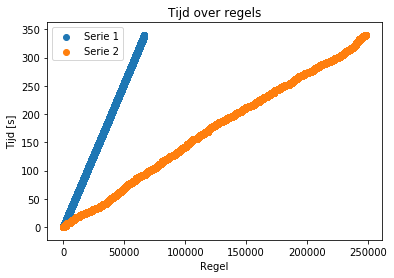

In [18]:
# Opgave 4.6a
time_tags1 = np.loadtxt('data/Timetags1.txt')
time_tags2 = np.loadtxt('data/Timetags2.txt')

# De regel van het tijdstip is gewoon gelijk aan het aantal regels dat hij ervoor geprint heeft
# Voor de y coördinaten kan dus gewoon een linspace gebruikt worden tussen 0 en de lengte van de arrays
plt.scatter(np.linspace(0, np.shape(time_tags1)[0], len(time_tags1)), time_tags1, label='Serie 1')
plt.scatter(np.linspace(0, np.shape(time_tags2)[0], len(time_tags2)), time_tags2, label='Serie 2')

plt.xlabel('Regel')
plt.ylabel('Tijd [s]')
plt.title('Tijd over regels')
plt.legend()
plt.show()

In [19]:
# Opgave 4.6b
print(f'Duratie serie 1 [s]: {np.max(time_tags1)}; Duratie serie 2 [s]: {np.max(time_tags2)}')
print(f'Frequentie photonen serie 1 [/s]: {len(time_tags1) / np.max(time_tags1)}; Frequentie photonen serie 2 [/s]: {len(time_tags2) / np.max(time_tags2)}')


Duratie serie 1 [s]: 339.8384593; Duratie serie 2 [s]: 339.83815899999996
Frequentie photonen serie 1 [/s]: 195.88718750997467; Frequentie photonen serie 2 [/s]: 730.2740831997033


De laser stond waarschijnlijk aan bij serie 2, want daar zijn de meeste photonen waargenomen.

# Opgave 4.6c
Je kan nooit een perfect donkere kamer hebben dus je zal altijd een paar photonen hebben.

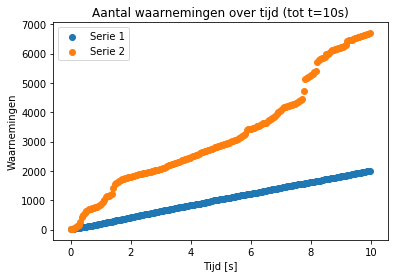

In [20]:
# Opgave 4.6d
bin_size = 0.05

# Bereken de bins en de centra voor serie 1
bins = np.arange(0, max(time_tags1), bin_size)
centra1 = (bins[:-1] + 0.5 * bin_size)[:200]

# Bereken de histogram voor serie 1
time_tags1_hist, grenzen = np.histogram(time_tags1, bins)

# Bereken de bins en de centra voor serie 2
bins = np.arange(0, max(time_tags2), bin_size)
centra2 = (bins[:-1] + 0.5 * bin_size)[:200]

# Bereken de histogram voor serie 2
time_tags2_hist, grenzen = np.histogram(time_tags2, bins)[:200]

# 10s/50ms = 200, dus de arrays hebben alleen de eerste 200 elementen nodig
time_tags1_filtered = np.cumsum(time_tags1_hist[:200])
time_tags2_filtered = np.cumsum(time_tags2_hist[:200])

plt.scatter(centra1, time_tags1_filtered, label='Serie 1')
plt.scatter(centra2, time_tags2_filtered, label='Serie 2')

plt.xlabel('Tijd [s]')
plt.ylabel('Waarnemingen')
plt.title('Aantal waarnemingen over tijd (tot t=10s)')
plt.legend()
plt.show()

/Users/julian/PycharmProjects/Df/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/julian/PycharmProjects/Df/venv/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


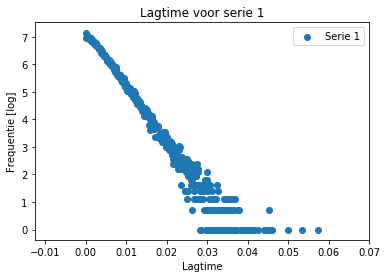

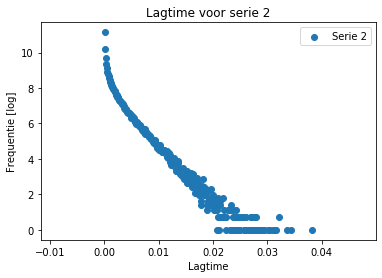

In [21]:
# Opgave 4.6e
lagtime1 = np.diff(time_tags1)
lagtime2 = np.diff(time_tags2)

bin_size = 0.0001

bins = np.arange(0, np.max(lagtime1), bin_size)
centra = bins[:-1] + 0.5 * bin_size

frequencies1, grenzen1 = np.histogram(lagtime1, bins)

plt.scatter(centra, np.log(frequencies1), label='Serie 1')

plt.title('Lagtime voor serie 1')
plt.xlabel('Lagtime')
plt.ylabel('Frequentie [log]')
plt.legend()
plt.show()

bins = np.arange(0, np.max(lagtime2), bin_size)
centra = bins[:-1] + 0.5 * bin_size

frequencies2, grenzen2 = np.histogram(lagtime2, bins)

plt.scatter(centra, np.log(frequencies2), label='Serie 2')
plt.title('Lagtime voor serie 2')
plt.xlabel('Lagtime')
plt.ylabel('Frequentie [log]')
plt.legend()
plt.show()

Voor de grafiek van serie 1 zien we een lineair verband tussen de lagtime en log(frequentie), er is dus een exponentieel verband tussen lagtime en frequentie. Bij serie 2 zien we ook een lineair verband, totdat de lagtime klein wordt, dan neemt hij exponentieel toe. Dit verschil is te verklaren doordat bij serie 2 de laser aanstaat. Deze zend snel achterelkaar bursts uit, waardoor er bij de kleine lagtime meer fotonen worden waargenomen. Dit is ook waarom in de vorige grafiek serie twee veel hoger uitkomt dan serie 1: er worden vaker fotonen met kleine lagtimes uitgezonden

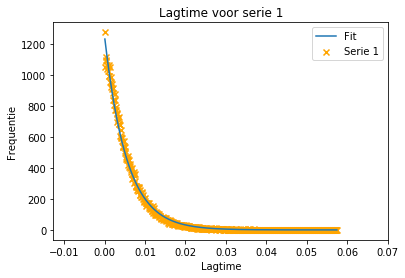

Voor y=e^(ax+b): a=-182.75±0.92, b=7.12±0.00


In [22]:
# Opgave 4.6f

def exponentieel(x, a, b):
    # Dit is de standaar exponentiele functie
    return np.exp(a*x + b)

bins = np.arange(0, np.max(lagtime1), bin_size)
centra = bins[:-1] + 0.5 * bin_size

plt.scatter(centra, frequencies1, label='Serie 1', marker='x', color='orange')

# Probeert de exponentiele functie op de lag van sessie 1 te fitten
p_fit, cov = curve_fit(exponentieel, centra, frequencies1, p0=[-150, 7.5])
plt.plot(centra, exponentieel(centra, *p_fit), label='Fit')

plt.title('Lagtime voor serie 1')
plt.xlabel('Lagtime')
plt.ylabel('Frequentie')
plt.legend()
plt.show()

print(f'Voor y=e^(ax+b): a={p_fit[0]:.2f}±{np.sqrt(cov[0,0]):.2f}, b={p_fit[1]:.2f}±{np.sqrt(cov[1,1]):.2f}')

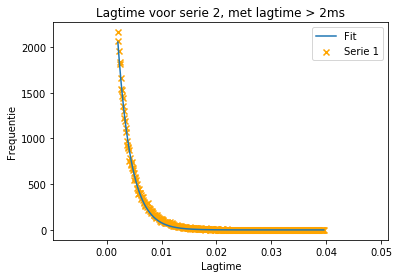

Voor y=e^(ax+b): a=-411.36±2.41, b=8.47±0.01


In [23]:
# Opgave 4.6g


lagtime2_start = np.where(lagtime2 > 0.002)[0][0]
lagtime2_filtered = lagtime2[lagtime2_start:]

bins = np.arange(0.002, np.max(lagtime2_filtered), bin_size)
centra = bins[:-1] + 0.5 * bin_size

frequencies2_filtered, grenzen2_filtered = np.histogram(lagtime2_filtered, bins)

plt.scatter(centra, frequencies2_filtered, label='Serie 1', marker='x', color='orange')

# Probeert de exponentiele functie op de lag van sessie 2 te fitten, waarvoor geldt dat lagtime > 2ms
p_fit, cov = curve_fit(exponentieel, centra, frequencies2_filtered, p0=[-150, 7.5])
plt.plot(centra, exponentieel(centra, *p_fit), label='Fit')

plt.title('Lagtime voor serie 2, met lagtime > 2ms')
plt.xlabel('Lagtime')
plt.ylabel('Frequentie')
plt.legend()
plt.show()

print(f'Voor y=e^(ax+b): a={p_fit[0]:.2f}±{np.sqrt(cov[0,0]):.2f}, b={p_fit[1]:.2f}±{np.sqrt(cov[1,1]):.2f}')

In $y=e^{ax + b}$ moet de macht eenheidsloos zijn en we weten dat x in seconden is, dat betekent dus dat a een eenheid van $s^{-1}$ moet hebben. In dit geval is a dus de verhouding tussen de timelag en het aantal weergenomen fotonen.

We zien dat serie 1 waarbij de laser uit staat dat de frequentie overeen komt met de gemiddelde frequentie die we hadden berekend. Bij serie 2 echter zien we een verschil, dit valt te verklaren doordat we alle hoge frequenties eruit hebben gefilterd.

In [24]:
def autocorrelate(time, I, tau):
    # Dit is de functie voor autocorrelatie
    I = (I - np.mean(I)) / np.std(I)
    autocorrelation=[]
    for t in tau:
        shift = np.argmax(time > t)
        autocorrelation.append(np.mean(I[:-shift]*I[shift:]))
    return autocorrelation

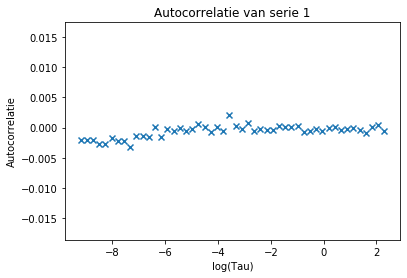

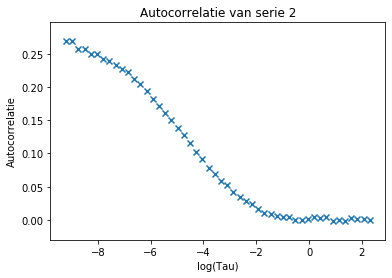

In [25]:
# Opgave 4.6h
tau = np.logspace(-4, 1, 50)
bin_size = 0.0001

# Hier worden de bins en centra van de bins voor beide sessies berekend
# De bins worden gebruikt voor de histogramverdeling en de centras worden met de histogramverdeling
# gebruikt om de autocorrelatie te berekenen
bins1 = np.arange(0, max(time_tags1), bin_size)
centra1 = bins1[:-1] + 0.5 * bin_size

intensity1, grenzen = np.histogram(time_tags1, bins1)
corr1 = autocorrelate(bins1, intensity1, tau)

bins2 = np.arange(0, max(time_tags2), bin_size)
centra2 = bins2[:-1] + 0.5 * bin_size

intensity2, grenzen = np.histogram(time_tags2, bins2)
corr2 = autocorrelate(centra2, intensity2, tau)

plt.scatter(np.log(tau), corr1, marker='x')
plt.title('Autocorrelatie van serie 1')
plt.xlabel('log(Tau)')
plt.ylabel('Autocorrelatie')
plt.show()

plt.scatter(np.log(tau), corr2, marker='x')
plt.title('Autocorrelatie van serie 2')
plt.xlabel('log(Tau)')
plt.ylabel('Autocorrelatie')
plt.show()

Doordat in serie 1 de laser uit stond werd er op elke tijd ongeveer evenveel photonen gemeten, dus de grafiek was een rechte lijn. Daardoor zal de grafiek weinig/geen overlap hebben als het een stukje in de tijd wordt verschoven. De gemeten hoeveelheid photonen in serie 2 zal lang niet zo linear zijn, doordat de laser aanstond. We zien dus ook dat er in het begin onder verschuiving nog enige overlap is, totdat de verschuiving te groot wordt, waarna de autocorrelatie naar 0 gaat.

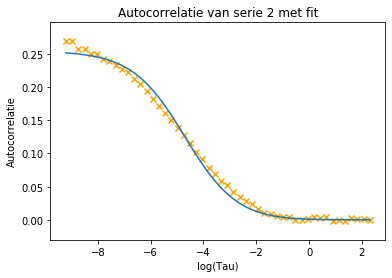

Tau = 0.0092±0.0004


In [26]:
# Opgave 4.6i

def FCS(x, N, tau):
    # Dit is de standaard functie voor de autocorrelatie van Fluorescence Correlation Spectroscopy
    return 1/(N* (1 + x/tau)*((1+ (1/25)*x/tau))**0.5)

plt.scatter(np.log(tau), corr2, marker='x', color='orange')
plt.title('Autocorrelatie van serie 2 met fit')
plt.xlabel('log(Tau)')
plt.ylabel('Autocorrelatie')

# Probeert de FCS functie te fitten op de autocorrelatie van sessie 2
p_fit, cov = curve_fit(FCS, tau, corr2, p0=[4, 0.001])
plt.plot(np.log(tau), FCS(tau, *p_fit), label='Fit')
plt.show()

print(f'Tau = {p_fit[1]:.4f}±{np.sqrt(cov[1,1]):.4f}')

# Opgave 4.6j
$w^2$ is de golflengte van de laser.
Invullen van de formule geeft $D = \frac{(500nm)^2}{0.0092s} = 2.7\cdot10^{-11} m^2/s $

# Opgave 4.6k

$R=\frac{K_BT}{6\pi\mu D} = \frac{k_B \cdot 20^\circ C}{6\pi \cdot 1.0016 mPas \cdot 2.7\cdot10^{-11} m^2/s} = 7.9nm$